In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("Databases/2021/All_Player_Data.db")

In [3]:
query = ("""SELECT 
                player_name, time, team_title, League, npg, npxg,
                (CAST(npg AS REAL)*90)/time AS npg_p90,
                (npxg*90)/time AS npxg_p90
            FROM 
                All_Player_Data
            WHERE
                (position LIKE '%F%' OR position LIKE '%S%')
                AND CAST(npg AS INTEGER)>2
                AND CAST(time AS INTEGER)>700
            ORDER BY (CAST(npxg AS REAL)*90)/time DESC
    """)
df = pd.read_sql(query, conn)
conn.close()

epl = df.loc[df.League == 'EPL']
bundesliga = df.loc[df.League == 'Bundesliga']
la_liga = df.loc[df.League == 'La_liga']
serie_a = df.loc[df.League == 'Serie_A']
ligue_1 = df.loc[df.League == 'Ligue_1']

In [4]:
def get_annotation(name):
    annotation = df.loc[df.player_name == name]
    plt.annotate(name, (annotation.npg_p90+0.01, annotation.npxg_p90), color = 'w')

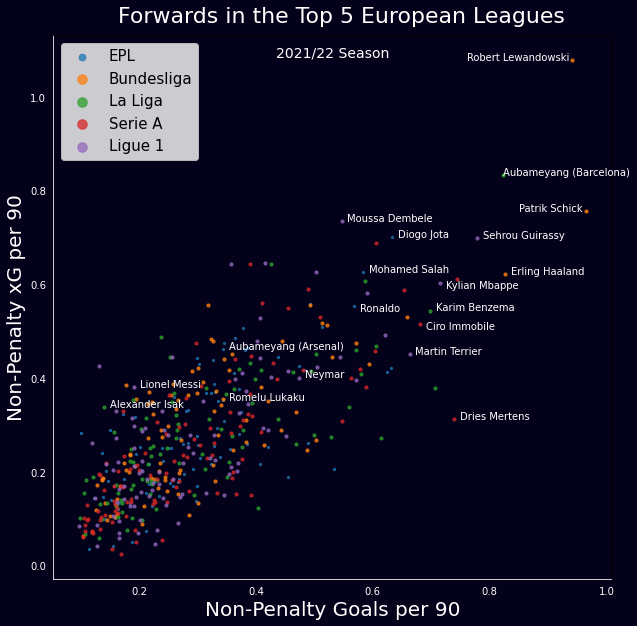

In [5]:
fig, ax =plt.subplots(figsize=(10,10))
ax.set_facecolor('#03021a')
fig.patch.set_facecolor('#03021a') 
plt.xlabel('Non-Penalty Goals per 90', color="w", fontsize=20)
plt.ylabel('Non-Penalty xG per 90', color="w", fontsize=20)
plt.suptitle('Forwards in the Top 5 European Leagues', x=0.525, y=0.92, color = 'w', fontsize = 22)
plt.title('2021/22 Season', y=0.95, color="w", fontsize=14)
ax.spines['left'].set_color('w')
ax.spines['bottom'].set_color('w')
plt.xticks(color='w')
plt.yticks(color='w')

point_size = 10

plt.scatter(epl.npg_p90, epl.npxg_p90,5, alpha = 0.75, label='EPL')
plt.scatter(bundesliga.npg_p90, bundesliga.npxg_p90, point_size, alpha=.75, label='Bundesliga')
plt.scatter(la_liga.npg_p90, la_liga.npxg_p90, point_size, alpha=.75, label='La Liga')
plt.scatter(serie_a.npg_p90, serie_a.npxg_p90, point_size, alpha=.75, label='Serie A')
plt.scatter(ligue_1.npg_p90, ligue_1.npxg_p90, point_size, alpha=.75, label='Ligue 1')

annotation = df.loc[df.player_name == 'Robert Lewandowski']
plt.annotate('Robert Lewandowski', (annotation.npg_p90-0.18, annotation.npxg_p90), color = 'w')
annotation = df.loc[df.player_name == 'Patrik Schick']
plt.annotate('Patrik Schick', (annotation.npg_p90-0.115, annotation.npxg_p90), color = 'w')
get_annotation('Erling Haaland')
get_annotation('Diogo Jota')
get_annotation('Karim Benzema')
get_annotation('Sehrou Guirassy')
annotation = df.loc[df.player_name == 'Pierre-Emerick Aubameyang']
plt.annotate('Aubameyang (Barcelona)', (annotation.iloc[[0]].npg_p90, annotation.iloc[[0]].npxg_p90), color = 'w')
plt.annotate('Aubameyang (Arsenal)', (annotation.iloc[[1]].npg_p90+0.01, annotation.iloc[[1]].npxg_p90), color = 'w')
annotation = df.loc[df.player_name == 'Kylian Mbappe-Lottin']
plt.annotate('Kylian Mbappe', (annotation.npg_p90+0.01, annotation.npxg_p90-0.01), color = 'w')
get_annotation('Martin Terrier')
annotation = df.loc[df.player_name == 'Ciro Immobile']
plt.annotate('Ciro Immobile', (annotation.npg_p90+0.01, annotation.npxg_p90-0.01), color = 'w')
get_annotation('Dries Mertens')
get_annotation('Moussa Dembele')
get_annotation('Mohamed Salah')
annotation = df.loc[df.player_name == 'Cristiano Ronaldo']
plt.annotate('Ronaldo', (annotation.npg_p90+0.01, annotation.npxg_p90-0.01), color = 'w')
get_annotation('Lionel Messi')
get_annotation('Neymar')
get_annotation('Romelu Lukaku')
get_annotation('Alexander Isak')


plt.legend(loc="upper left", fontsize = 15, markerscale = 3)
plt.savefig('ForwardsGraph')
plt.show()